In [1]:
import pandas as pd

movies_columns = ["MovieID", "Title", "Genres"]
ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
users_columns = ["UserID", "Gender", "Age", "Occupation", "Zip Code"]

movies_data = pd.read_csv('movies.dat', sep="::", engine="python", header=None, names=movies_columns, encoding="ISO-8859-1")
ratings_data = pd.read_csv('ratings.dat', sep="::", engine="python", header=None, names=ratings_columns, encoding="ISO-8859-1")
users_data = pd.read_csv('users.dat', sep="::", engine="python", header=None, names=users_columns, encoding="ISO-8859-1")



In [2]:
# Load the movies and ratings data. 

print("Movies Data:")
movies_data


Movies Data:


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [3]:

print("Ratings Data:")
ratings_data


Ratings Data:


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:

print("Users Data:")
users_data



Users Data:


,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


# What do you mean by Singular Value Decomposition (SVD)

* SVD is a matrix factorization technique that decomposes a matrix into three other matrices. It’s often used in recommendation systems because it can discover latent features underlying the interactions between users and items (movies, in this case). This can also help is data compression and also gives us the eigen values for this rectanglar matrices as its not possible with normal method for then and these eigen values can lead to us finding patterns in the dataset.

# Explain content-based vs collaborative recommendation
**Content-Based Recommendation Systems**

Content-based recommendation systems suggest items by comparing the content of the items and a user profile. The content of each item is represented as a set of descriptors, such as the words in a document, the genre of a movie, or the category of a product.

For example, if a user has watched many "action" movies, the system would recommend other "action" movies to this user. This is because the system recognizes a pattern in the user's behavior indicating a preference for "action" movies.

**Collaborative Filtering Recommendation Systems**

Collaborative filtering doesn't require content information and instead relies on user behavior data. It recommends items based on users' past behavior. There are two main types of collaborative filtering:

- *User-User Collaborative Filtering*: This method finds users that are similar to the target user and recommend items that those similar users have liked in the past. For instance, if user A and user B have watched many of the same movies, and user B has watched a movie that user A hasn't, then the system would recommend that movie to user A.

- *Item-Item Collaborative Filtering*: This method instead calculates the similarity between items. If a user has interacted with an item, the system would recommend other items that are similar to it.

In summary, content-based systems recommend based on the similarity of item content, while collaborative filtering systems recommend based on the similarity of user behavior. Both have their strengths and weaknesses and are often used together in hybrid systems.

In [5]:
# 5. Creating a matrix with movies as rows and users as columns, followed by normalization.

import numpy as np

# Combining ratings and user data into a unified dataframe
combined_data = pd.merge(ratings_data, users_data, on="UserID")

movie_user_matrix = combined_data.pivot_table(index="MovieID", columns="UserID", values="Rating")
movie_user_matrix

movie_user_matrix.fillna(0, inplace=True)

z_score_matrix = (movie_user_matrix - movie_user_matrix.mean()) / (movie_user_matrix.std())

print("Normalized Matrix:")
z_score_matrix


Normalized Matrix:


UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,9.804008,-0.183154,-0.114537,-0.073196,-0.22285,7.176856,-0.09052,5.074627,7.670556,3.483171,...,-0.110003,5.517230,-0.124909,-0.073631,4.724035,-0.528899,-0.23332,-0.070846,-0.181969,2.440741
2,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,3.483171,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
3,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,0.997233,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
4,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,3.758009,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,2.239500,0.807684,-0.23332,-0.070846,-0.181969,-0.300839
5,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,0.997233,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,4.535332,2.718442,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
3949,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839
3950,-0.118882,-0.183154,-0.114537,-0.073196,-0.22285,-0.136660,-0.09052,-0.191844,-0.167505,-0.340476,...,-0.110003,-0.164819,-0.124909,-0.073631,-0.245034,-0.528899,-0.23332,-0.070846,-0.181969,-0.300839


In [6]:
# 6. Perform SVD to get U, S and V. 

U, S, Vt = np.linalg.svd(z_score_matrix, full_matrices=False)

print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of Vt:", Vt.shape)

Shape of U: (3706, 3706)
Shape of S: (3706,)
Shape of Vt: (3706, 6040)


In [7]:
U

array([[ 8.48994577e-02, -1.98362830e-02,  4.05823584e-02, ...,
        -3.62154543e-12,  2.84042304e-13,  1.04326341e-04],
       [ 1.18705057e-02,  2.59919618e-02,  2.82688461e-03, ...,
        -3.62147610e-12,  2.84060789e-13,  1.04326341e-04],
       [ 3.81558204e-03,  6.15568174e-03,  1.41212039e-02, ...,
        -3.62157834e-12,  2.84046525e-13,  1.04326341e-04],
       ...,
       [-7.76380106e-03, -6.56079240e-04,  6.67852236e-04, ...,
        -3.62161414e-12,  2.83842512e-13,  1.04326341e-04],
       [-8.28316977e-03, -1.38226562e-03,  1.82995078e-03, ...,
        -3.62151382e-12,  2.84180550e-13,  1.04326341e-04],
       [ 4.55260560e-03, -1.08551039e-02,  1.47489204e-02, ...,
        -3.62149775e-12,  2.84022329e-13,  1.04326341e-04]])

In [8]:
S


array([1.65002390e+03, 7.72222273e+02, 7.38047199e+02, ...,
       1.27197401e-13, 1.27197401e-13, 1.08410286e-13])

In [9]:
Vt

array([[ 0.01084796,  0.01432028,  0.01320323, ...,  0.00506512,
         0.00885683,  0.01630522],
       [-0.00740186,  0.0030458 ,  0.00523174, ..., -0.00492517,
        -0.01477093, -0.02560488],
       [ 0.00072875,  0.0009968 , -0.00255497, ..., -0.00363681,
        -0.02214009, -0.02142038],
       ...,
       [ 0.01368163,  0.00583356, -0.0007154 , ...,  0.01126212,
        -0.00134284,  0.00443171],
       [ 0.01396952, -0.00361381, -0.00100472, ...,  0.01435572,
         0.00456084, -0.00384318],
       [-0.01012464, -0.01373483,  0.00266863, ...,  0.00076096,
        -0.00332351, -0.00311318]])

In [10]:
# 7. Select top 50 components from S. 
S_50 = S[:50]
U_50 = U[:, :50]
Vt_50 = Vt[:50,:]

num_components = 50
truncated_S = np.diag(S[:num_components])

# Display the shape of the truncated S matrix
print("Shape of truncated S:", truncated_S.shape)
truncated_S


Shape of truncated S: (50, 50)


array([[1650.02389723,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  772.22227271,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  738.04719902, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  224.41508509,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         223.08889529,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  219.90385798]])

In [11]:
# 8. Obtaining the top 50 eigenvectors through eigenvalues.

# Calculate the covariance matrix
cov_matrix = np.cov(z_score_matrix, rowvar=False)

# Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top 50 eigenvectors
top_50_eigenvectors = eigenvectors[:, :50]

print("Shape of top 50 eigenvectors matrix:", top_50_eigenvectors.shape)
top_50_eigenvectors


Shape of top 50 eigenvectors matrix: (6040, 50)


array([[ 0.01084796+0.j, -0.00740186+0.j,  0.00072875+0.j, ...,
        -0.01616353+0.j, -0.02853217+0.j,  0.02016481+0.j],
       [ 0.01432028+0.j,  0.0030458 +0.j,  0.0009968 +0.j, ...,
         0.0034459 +0.j,  0.00392519+0.j, -0.00203337+0.j],
       [ 0.01320323+0.j,  0.00523174+0.j, -0.00255497+0.j, ...,
        -0.00494809+0.j, -0.01548148+0.j,  0.02391903+0.j],
       ...,
       [ 0.00506512+0.j, -0.00492517+0.j, -0.00363681+0.j, ...,
        -0.01172849+0.j,  0.00114426+0.j,  0.00778439+0.j],
       [ 0.00885683+0.j, -0.01477093+0.j, -0.02214009+0.j, ...,
        -0.0120055 +0.j,  0.00583587+0.j,  0.00441803+0.j],
       [ 0.01630522+0.j, -0.02560488+0.j, -0.02142038+0.j, ...,
        -0.00975208+0.j,  0.00150019+0.j, -0.00551331+0.j]])

In [12]:
# 9. Using cosine similarity, identify the 10 most similar movies based on 50 SVD components.

from sklearn.metrics.pairwise import cosine_similarity

# Compute movie representations in the 50-dimensional space using SVD components
movie_representations = np.dot(U_50, np.dot(np.diag(S_50), Vt_50))

cosine_sim = cosine_similarity(movie_representations, movie_representations)

num_closest_movies = 10
closest_movies_indices = np.argsort(-cosine_sim, axis=1)[:, 1:num_closest_movies + 1]

movie_titles = movies_data["Title"].values

def get_movie_titles(movie_indices):
    return [movie_titles[i] for i in movie_indices]

movie_index_to_search = 0
closest_movies = get_movie_titles(closest_movies_indices[movie_index_to_search])

# Display the 10 most similar movies for the specified movie
print(f"10 most similar movies to '{movie_titles[movie_index_to_search]}':")
for i, movie in enumerate(closest_movies):
    print(f"{i + 1}. {movie}")


10 most similar movies to 'Toy Story (1995)':
1. Bad Seed, The (1956)
2. Babe (1995)
3. Tie Me Up! Tie Me Down! (1990)
4. Hour of the Pig, The (1993)
5. Firelight (1997)
6. Wisdom (1986)
7. Paulie (1998)
8. Rounders (1998)
9. Higher Learning (1995)
10. Natural, The (1984)


# PART 2

In [13]:
# 1. Start by importing the dataset and exploring its structure.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('HousePrice.csv')
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05
1,5/2/14 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06
2,5/2/14 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05
3,5/2/14 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05
4,5/2/14 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/14 0:00,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05
4596,7/9/14 0:00,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05
4597,7/9/14 0:00,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05
4598,7/10/14 0:00,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05


2. What are the features and the target variable?

Variables or columns or features of the dataset are classified of two types. One is independent and other is dependent variables.

1)Features: Features or columns are called as independent variables in the dataset, which are used for predicting the target variable and explain changes in the target variable wrt feature variables. These are independent on other variables. the features are [date, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated]

2)Targetvariable: This is also called as dependent variable. Target variable is the one that we want to predict and explain the changes wrt the independent variables. This changes according to the factors of the independent variables. Sale price is the target varaible here

In [16]:
# 3. How many samples are in the dataset? Are there any missing values?
# 4600 and no they are not.

print('Number of samples:', len(df))
print('Missing values:\n', df.isnull().sum())

Number of samples: 4600
Missing values:
 date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64


In [17]:
print(df.dtypes)


date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
SalesPrice       float64
dtype: object


In [18]:
# 4. Summarize the dataset. Min, max, avg, std dev, etc. stats for continuous features.

df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


In [19]:
df_summary = pd.DataFrame(columns=['Feature', 'Mode', 'Mean', 'Median', 'Variance', 'Standard Deviation'])

for i in df.columns:
    if df[i].dtype in ['object', 'category']:
        mode = sts.mode(df[i])
        mean = median = variance = std_dev = 'N/A'
    else:
        mode = 'N/A'
        mean = sts.mean(df[i])
        median = sts.median(df[i])
        variance = sts.pvariance(df[i])
        std_dev = sts.pstdev(df[i])
    df_summary.loc[len(df_summary)] = [i, mode, mean, median, variance, std_dev]

df_summary

,Feature,Mode,Mean,Median,Variance,Standard Deviation
0,date,6/23/14 0:00,N/A,N/A,N/A,N/A
1,bedrooms,N/A,3.40087,3.0,0.825825,0.908749
2,bathrooms,N/A,2.160815,2.25,0.614179,0.783696
3,sqft_living,N/A,2139.346957,1980.0,927565.873969,963.102214
4,sqft_lot,N/A,14852.516087,7683.0,1287412824.222785,35880.535451
5,floors,N/A,1.512065,1.5,0.289691,0.53823
6,waterfront,N/A,0.007174,0.0,0.007122,0.084395
7,view,N/A,0.240652,0.0,0.605782,0.77832
8,condition,N/A,3.451739,3.0,0.45854,0.677156
9,sqft_above,N/A,1827.265435,1590.0,743173.750197,862.075258


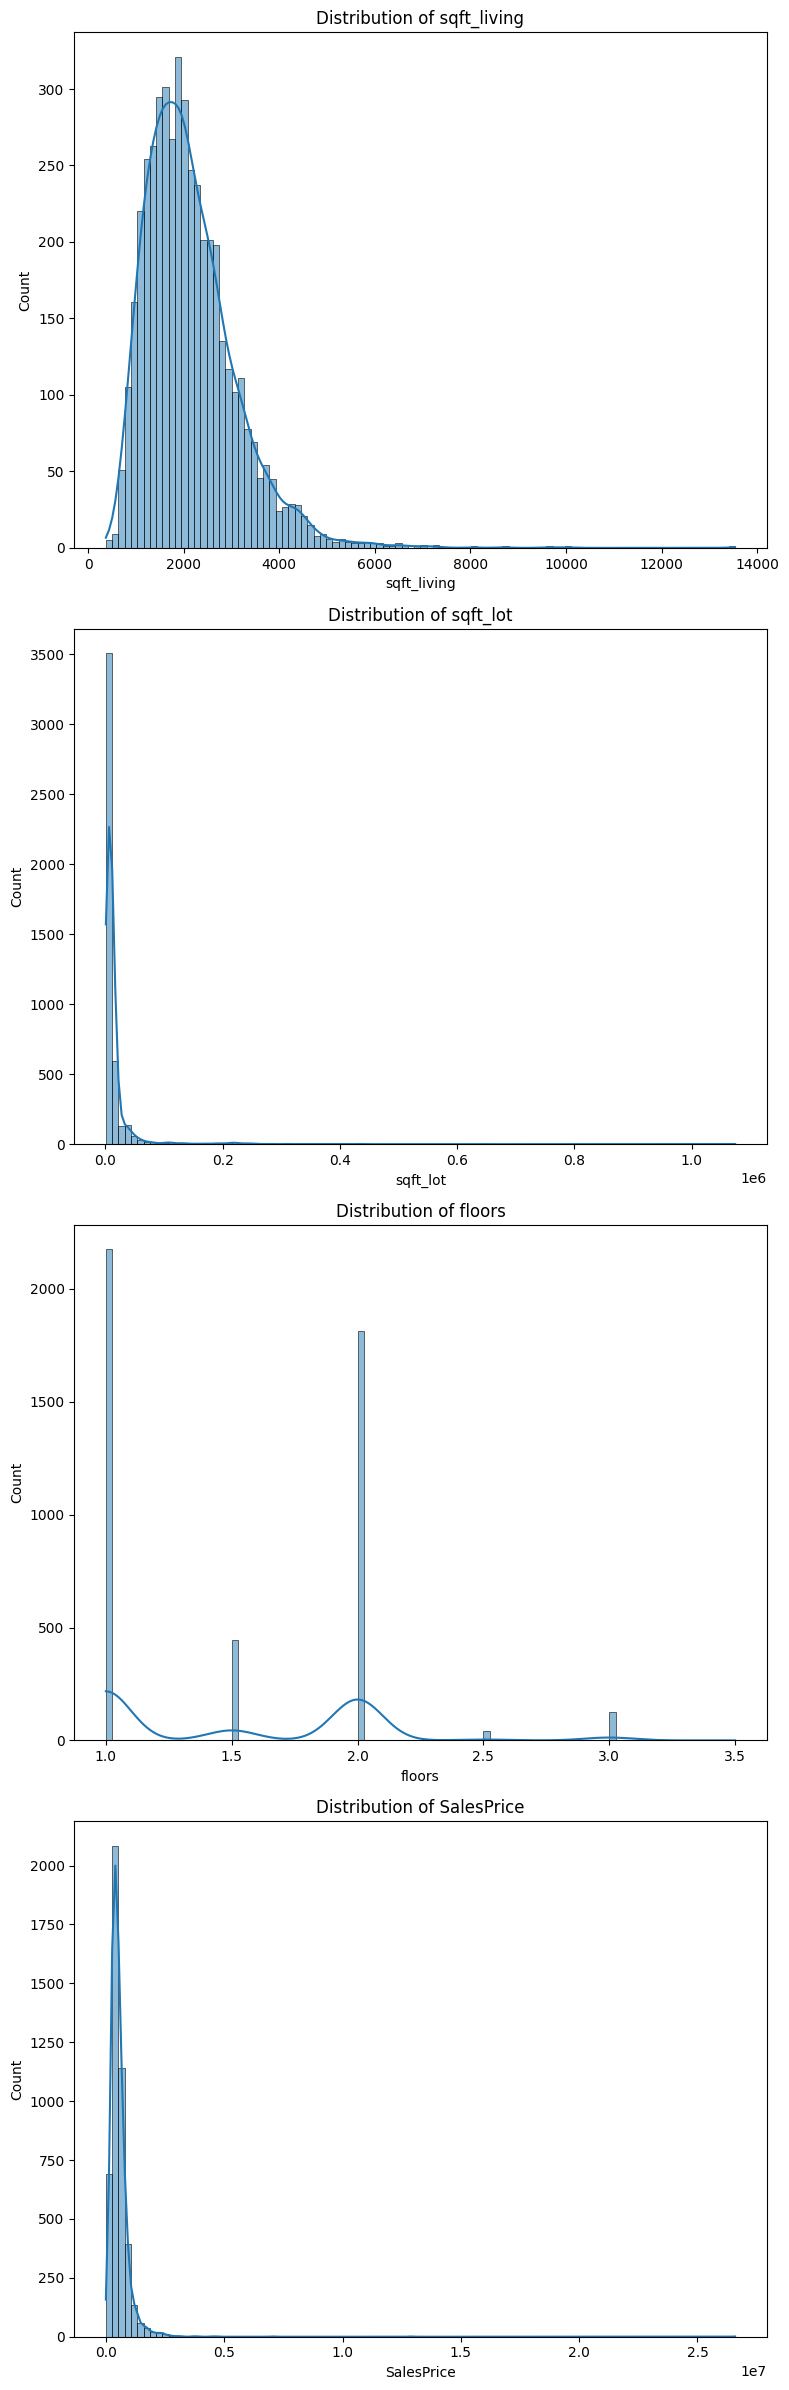

In [20]:
# 5. Visualize the distribution of each feature (sqft_living, sqft_lot, floors, SalesPrice)

columns = ['sqft_living', 'sqft_lot', 'floors', 'SalesPrice']

rows = len(columns)
cols = 1

fig, axs = plt.subplots(rows, cols, figsize=(8, 6*rows))

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=100, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


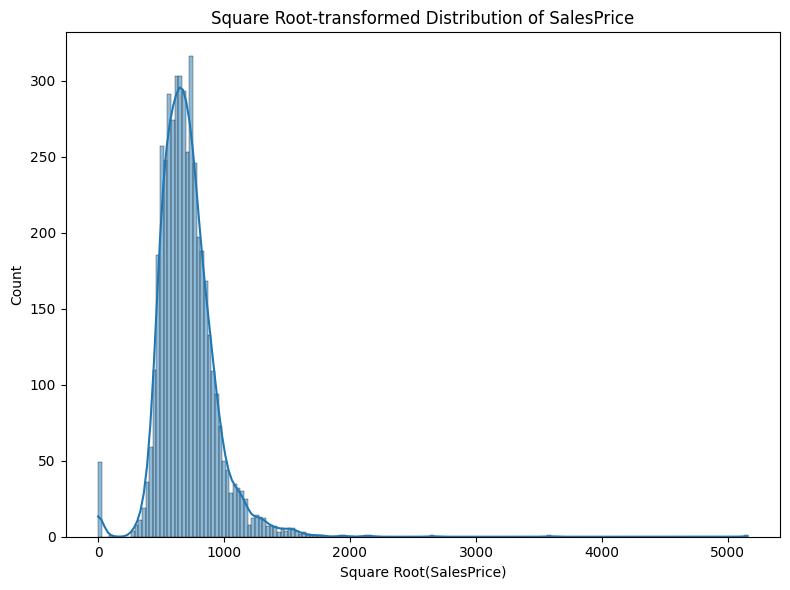

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Plot the histogram with a square root transformation on the y-axis
sns.histplot(df['SalesPrice']**0.5, kde=True, ax=axes)
axes.set_title('Square Root-transformed Distribution of SalesPrice')
axes.set_xlabel('Square Root(SalesPrice)')  # Update x-axis label

# Adjust layout
plt.tight_layout()
plt.show()


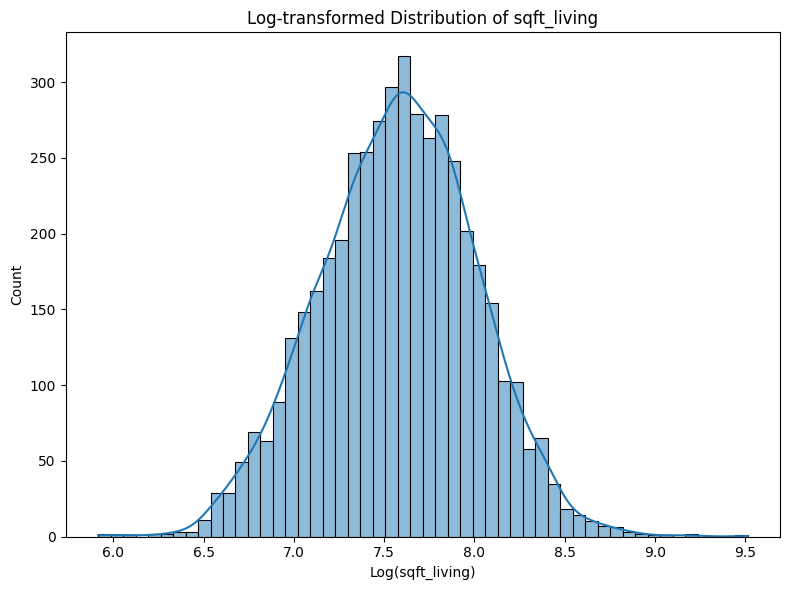

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

sns.histplot(np.log1p(df['sqft_living']), kde=True, ax=axes)
axes.set_title('Log-transformed Distribution of sqft_living')
axes.set_xlabel('Log(sqft_living)')  # Update x-axis label

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
# 6. Implementing a custom linear regression model with "sqft_lot" as the independent variable and "SalePrice" as the target variable.

X = df[['sqft_lot']]
y = df['SalesPrice']

# Defining a custom linear regression class
class CustomLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Adding a column of ones to X for the intercept
        X_b = np.c_[np.ones((len(X), 1)), X]

        # Linear regression using the Normal Equation
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Setting the intercept and coefficient
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

custom_model = CustomLinearRegression()
custom_model.fit(X, y)

custom_coef = custom_model.coef_[0]
custom_intercept = custom_model.intercept_

custom_coef, custom_intercept


(0.7927166756315326, 540189.1512958275)

In [24]:
# Extracting the independent variable (X) and the target variable (y)
X = df[['sqft_lot']]  
y = df['SalesPrice']   

model = LinearRegression()
# Fitting the model
model.fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_

print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")


Coefficient: 0.7927166756315298
Intercept: 540189.1512958275


In [25]:
# 7. Calculate the sum of squared errors for your model.

predictions = custom_model.predict(X)
errors = y - predictions
sum_of_squared_errors = np.sum(errors**2)

sum_of_squared_errors

1458344675295682.8

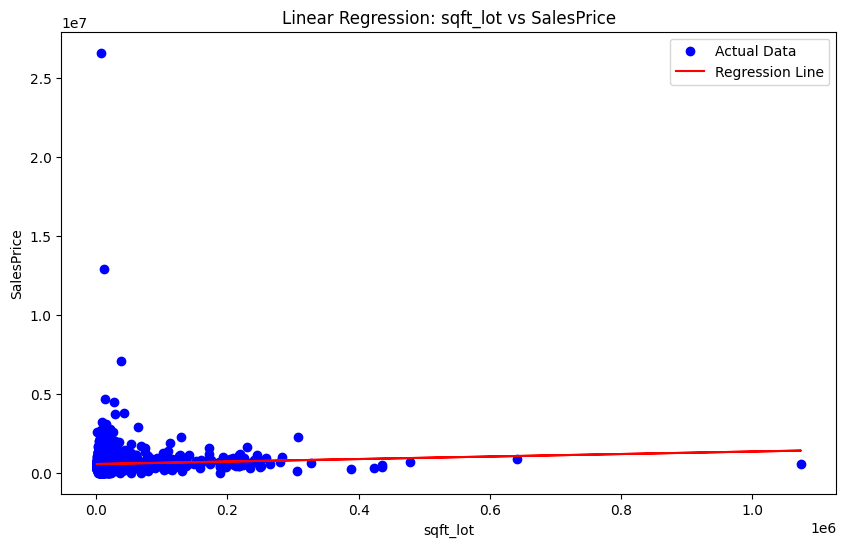

In [26]:
# 8. Plot the regression line along with the actual data points.

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')  # X is sqft_lot, y is SalesPrice
plt.plot(X, predictions, color='red', label='Regression Line')  # predictions 
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('Linear Regression: sqft_lot vs SalesPrice')
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()

# Fitting the sklearn model
sklearn_model.fit(X, y)

sk_coef = sklearn_model.coef_[0]
sk_intercept = sklearn_model.intercept_

print("Coef and Intercept from your model:")
print(f"Coef: {custom_coef}, Intercept: {custom_intercept}")

print("\nCoef and Intercept from sklearn's LinearRegression:")
print(f"Coef: {sk_coef}, Intercept: {sk_intercept}")


Coef and Intercept from your model:
Coef: 0.7927166756315326, Intercept: 540189.1512958275

Coef and Intercept from sklearn's LinearRegression:
Coef: 0.7927166756315298, Intercept: 540189.1512958275


In [28]:
# 10. Using LinearRegression from the sklearn.linear_model library with multiple features (sqft_living, sqft_lot).

from sklearn.linear_model import LinearRegression

X_multiple = df[['sqft_living', 'sqft_lot']]  # Independent variables (features)
y_multiple = df['SalesPrice']  # Target variable

sklearn_model_multiple = LinearRegression()

sklearn_model_multiple.fit(X_multiple, y_multiple)

sk_multiple_coef = sklearn_model_multiple.coef_
sk_multiple_intercept = sklearn_model_multiple.intercept_

print("Coef and Intercept from sklearn's LinearRegression with multiple features:")
print(f"Coefficients: {sk_multiple_coef}")
print(f"Intercept: {sk_multiple_intercept}")


Coef and Intercept from sklearn's LinearRegression with multiple features:
Coefficients: [257.13000008  -0.66039049]
Intercept: 11681.165815590997


In [29]:
# 11. Printing R-squared (R²) score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_multiple = df[['sqft_living', 'sqft_lot']]  
y_multiple = df['SalesPrice']  

sklearn_model_multiple = LinearRegression()

sklearn_model_multiple.fit(X_multiple, y_multiple)

# Calculating R² score using the score() method
r_squared = sklearn_model_multiple.score(X_multiple, y_multiple)
print(f"R-squared (R²) score: {r_squared}")

# Alternatively, R² score can also be calculated using the r2_score() function
y_predicted = sklearn_model_multiple.predict(X_multiple)
r_squared_alt = r2_score(y_multiple, y_predicted)
print(f"R-squared (R²) score calculated using r2_score(): {r_squared_alt}")


R-squared (R²) score: 0.18694097425375722
R-squared (R²) score calculated using r2_score(): 0.18694097425375722


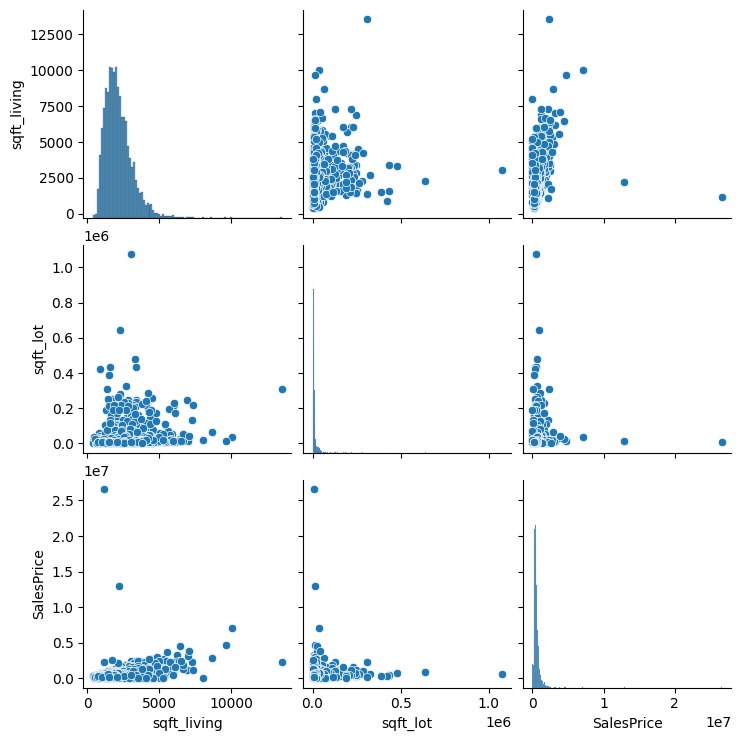

In [30]:
# 12. Visualize the relationships between the selected features and SalePrice.

import seaborn as sns

# Extracting the selected features and the target variable
selected_features = ['sqft_living', 'sqft_lot']
X_selected = df[selected_features]  # Selected features
y_selected = df['SalesPrice']  # Target variable

# Combining features and target variable into a single DataFrame
data_to_plot = X_selected.copy()
data_to_plot['SalesPrice'] = y_selected

# Creating a pair plot to visualize relationships
sns.pairplot(data_to_plot)
plt.show()


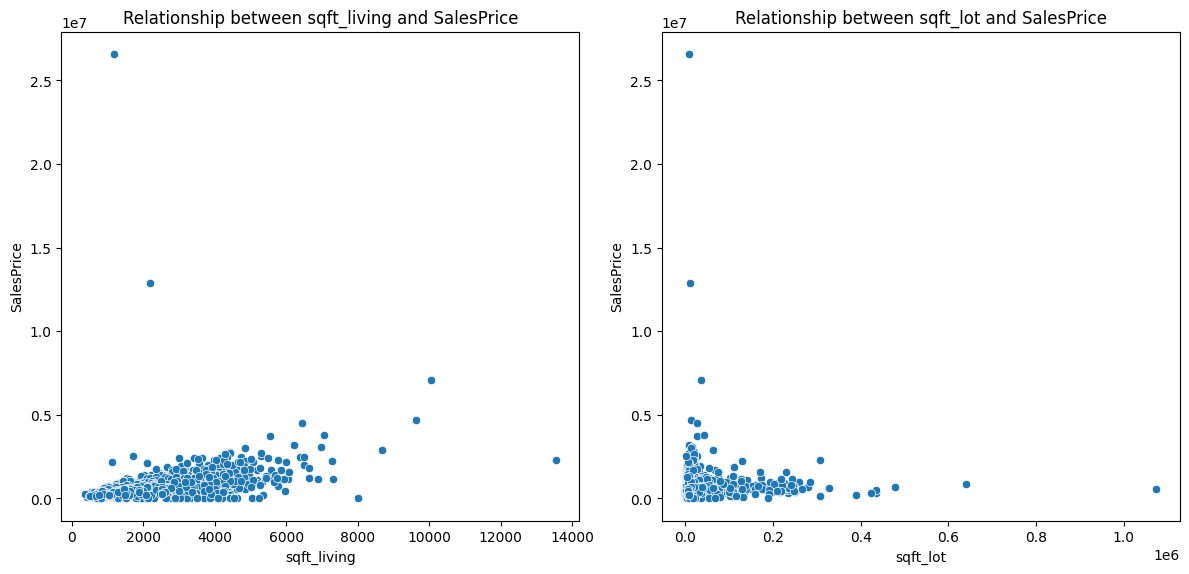

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for sqft_living vs SalesPrice
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sqft_living', y='SalesPrice', data=df)
plt.title('Relationship between sqft_living and SalesPrice')

# Scatter plot for sqft_lot vs SalesPrice
plt.subplot(1, 2, 2)
sns.scatterplot(x='sqft_lot', y='SalesPrice', data=df)
plt.title('Relationship between sqft_lot and SalesPrice')

plt.tight_layout()
plt.show()


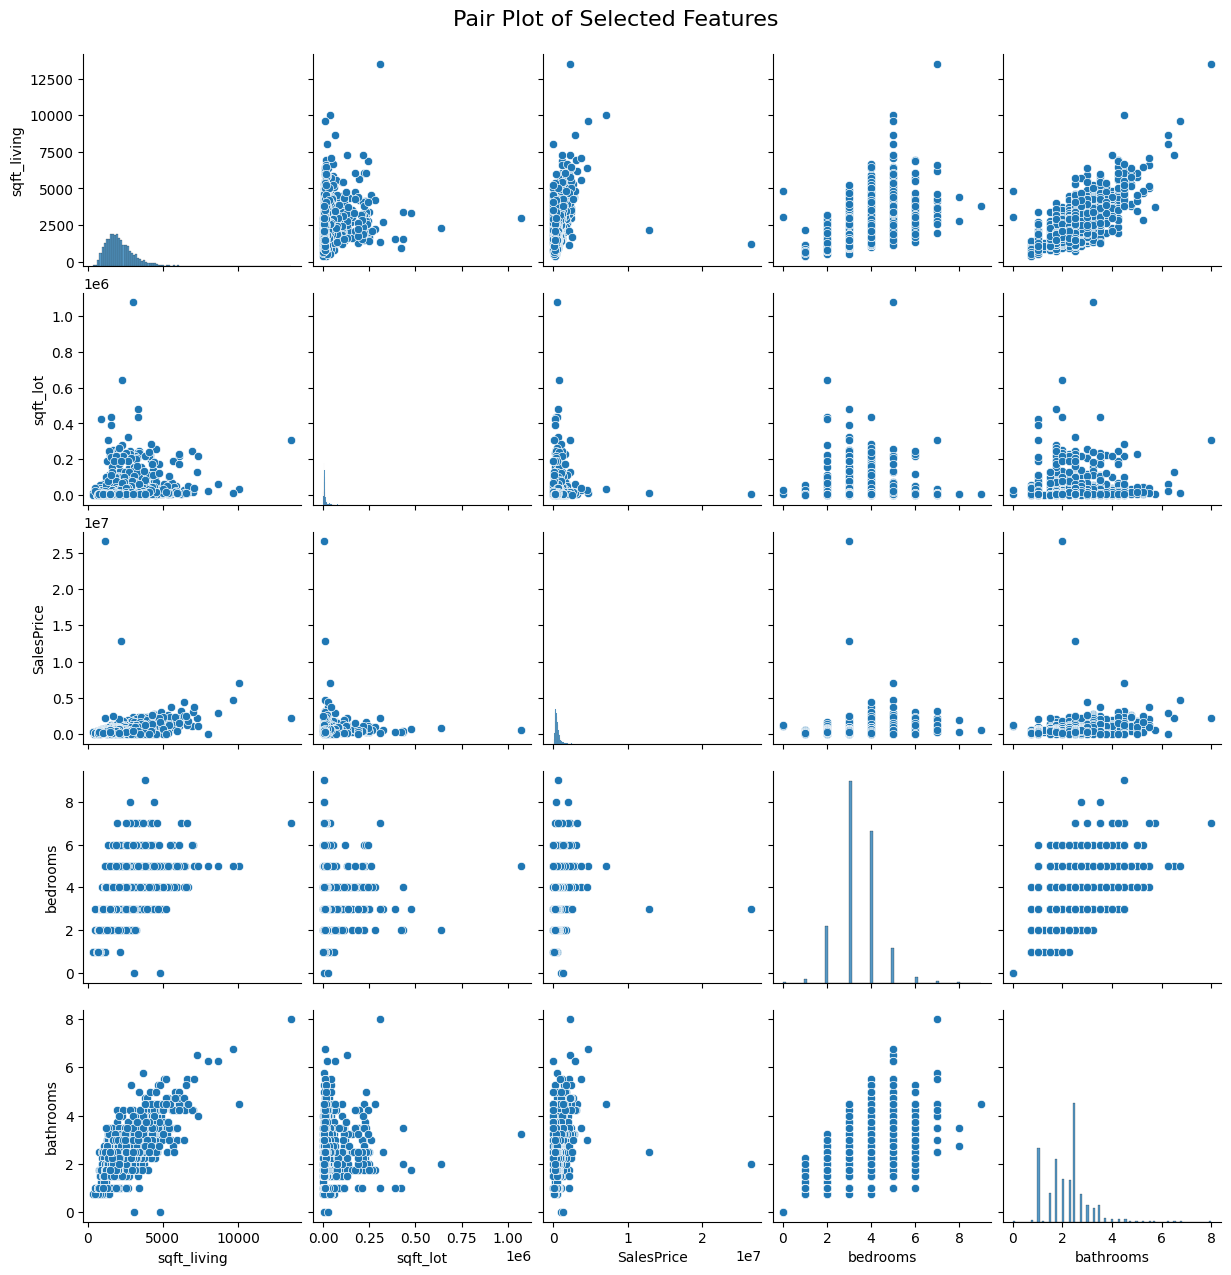

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of features for the pair plot
selected_features = ['sqft_living', 'sqft_lot', 'SalesPrice', 'bedrooms', 'bathrooms']

# Creating a pair plot
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02, size=16)
plt.show()


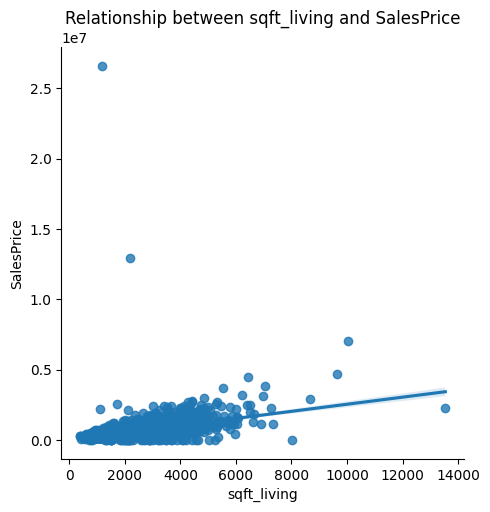

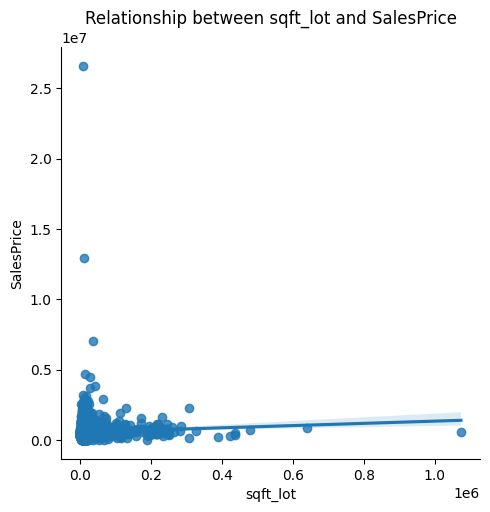

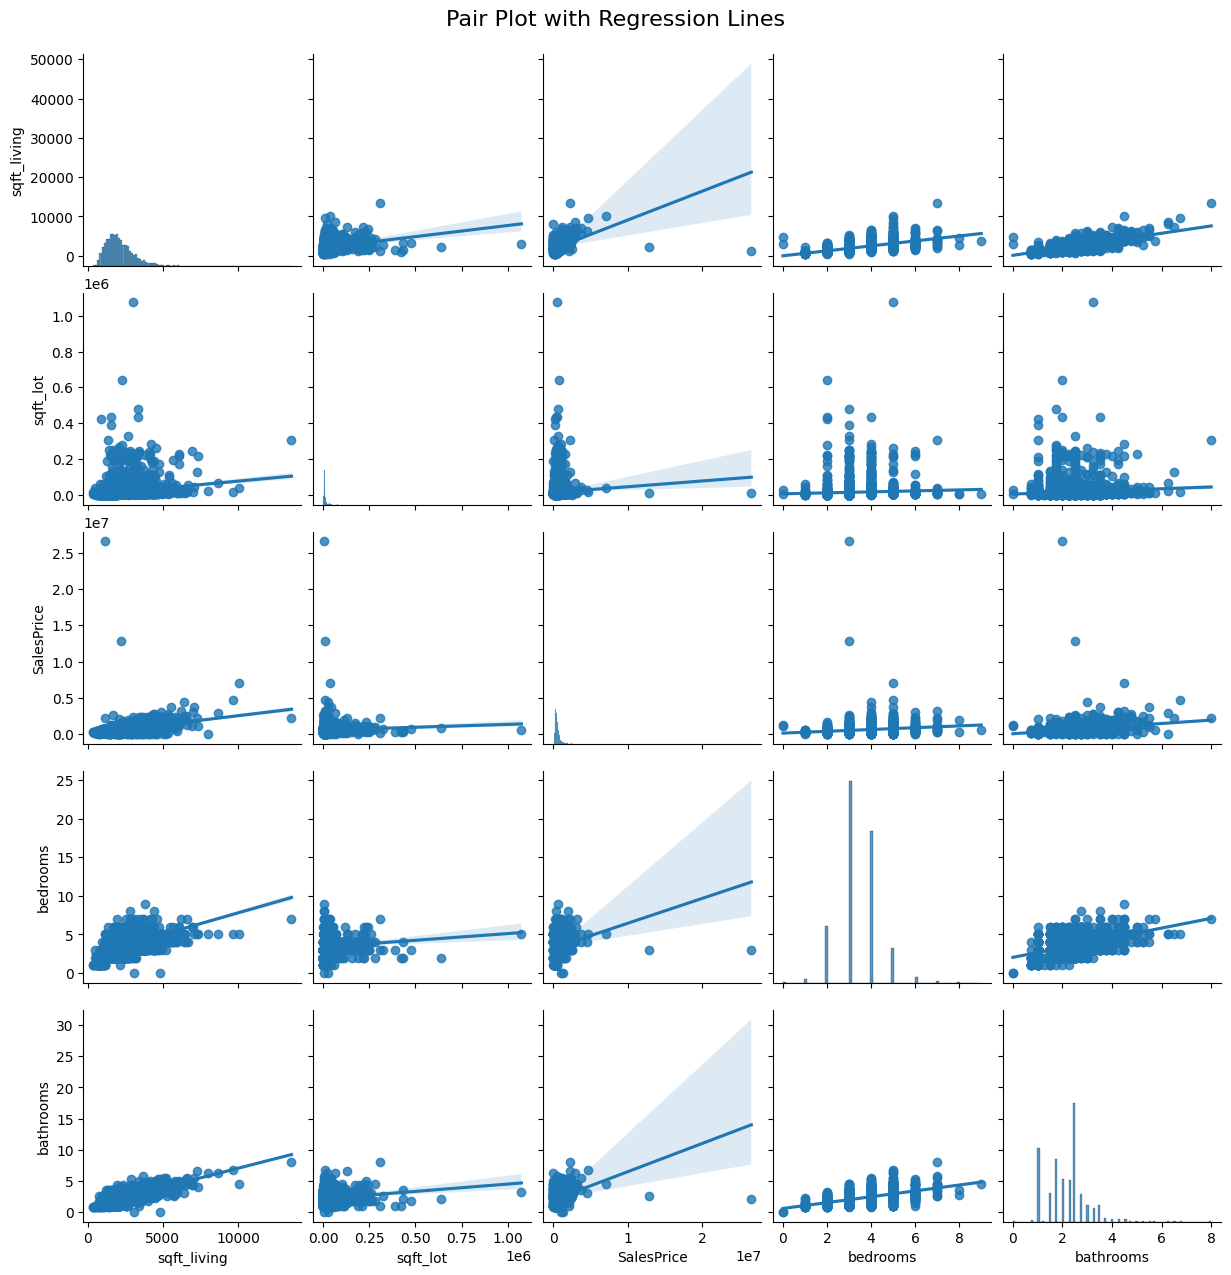

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom style for the plots

# scatter plot with regression lines for 'sqft_living' and 'SalesPrice'
sns.lmplot(x='sqft_living', y='SalesPrice', data=df)
plt.title('Relationship between sqft_living and SalesPrice')

#scatter plot with regression lines for 'sqft_lot' and 'SalesPrice'
sns.lmplot(x='sqft_lot', y='SalesPrice', data=df)
plt.title('Relationship between sqft_lot and SalesPrice')

# pair plot with regression lines for selected features
selected_features = ['sqft_living', 'sqft_lot', 'SalesPrice', 'bedrooms', 'bathrooms']
sns.pairplot(df[selected_features], kind='reg')
plt.suptitle('Pair Plot with Regression Lines', y=1.02, size=16)

plt.show()


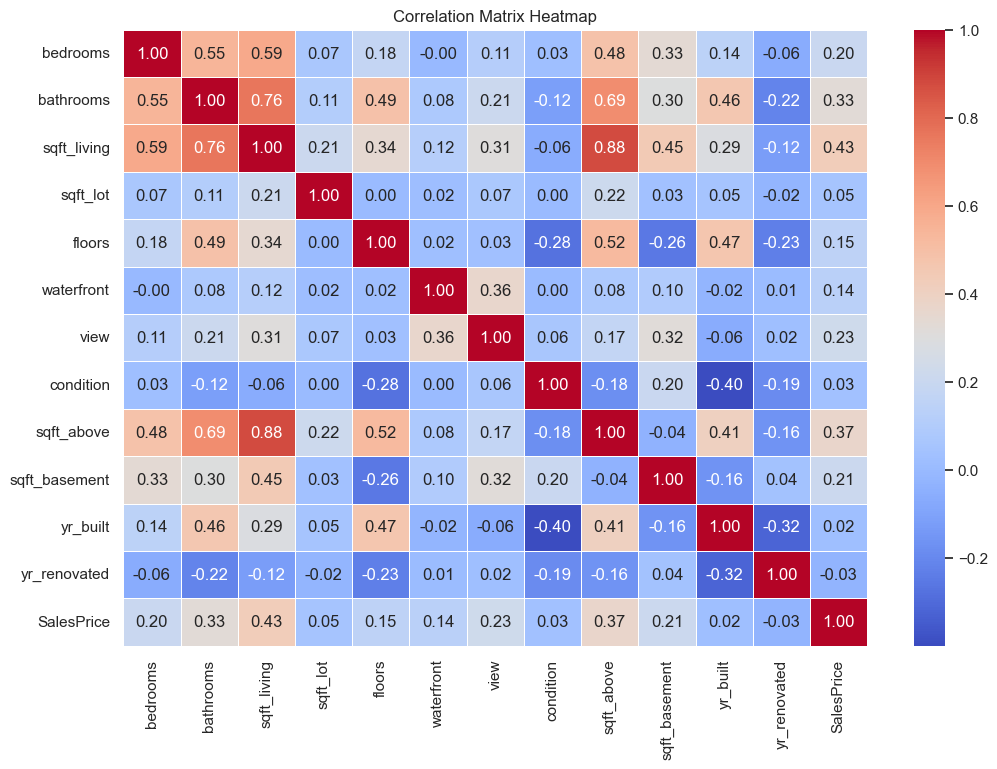

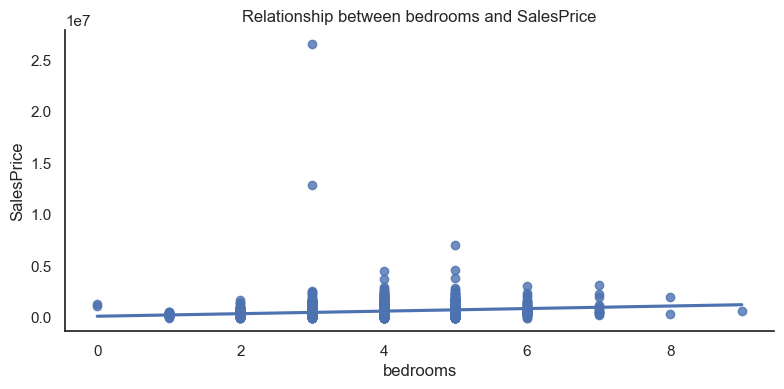

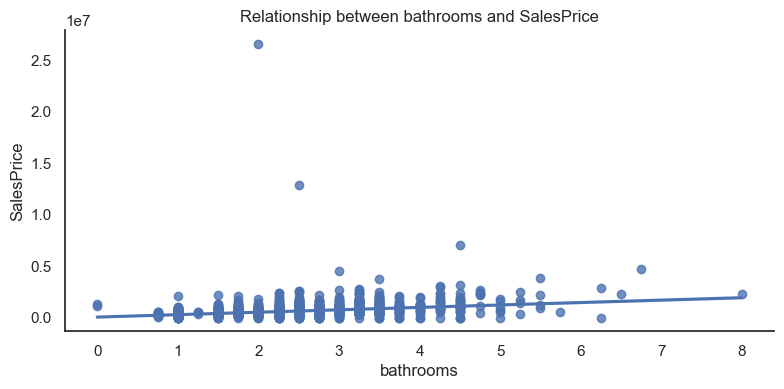

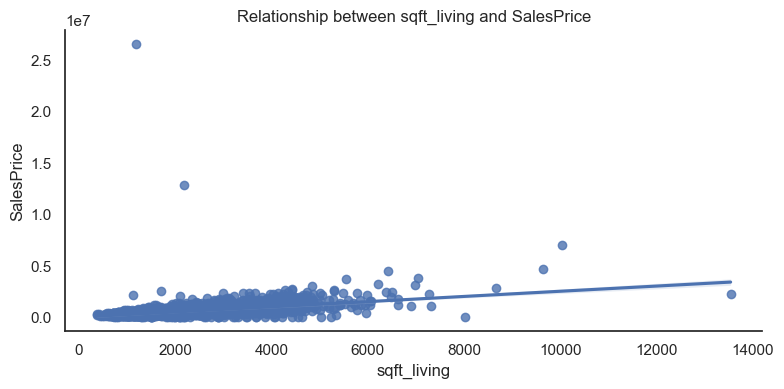

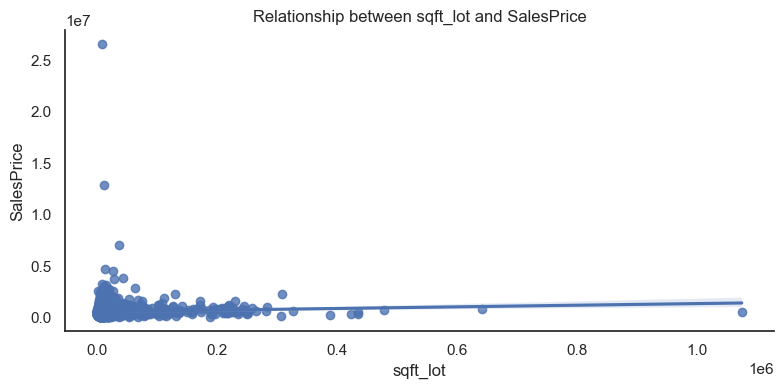

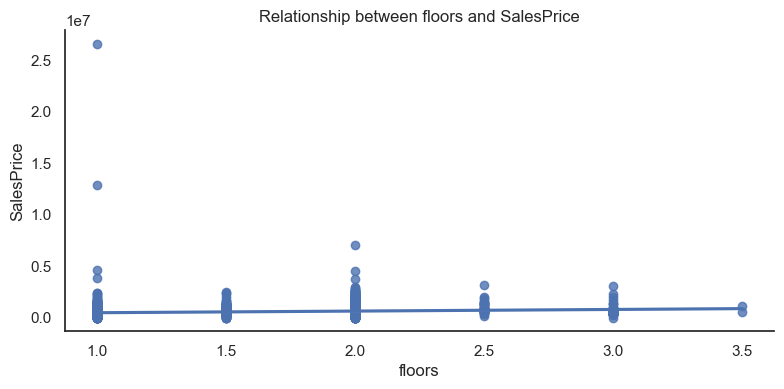

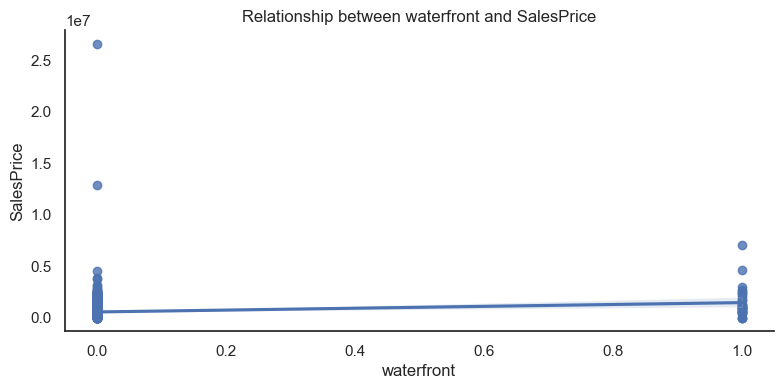

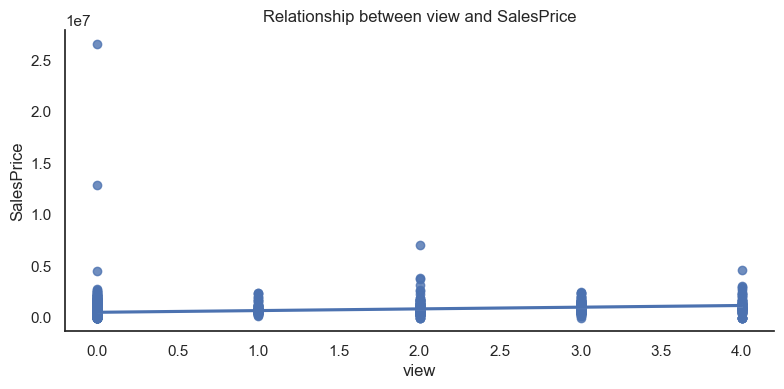

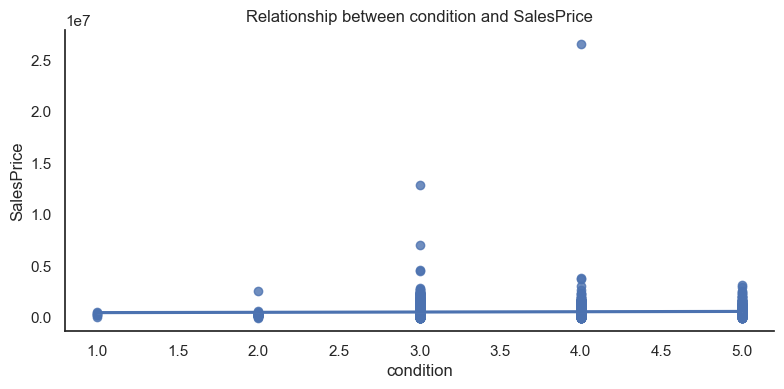

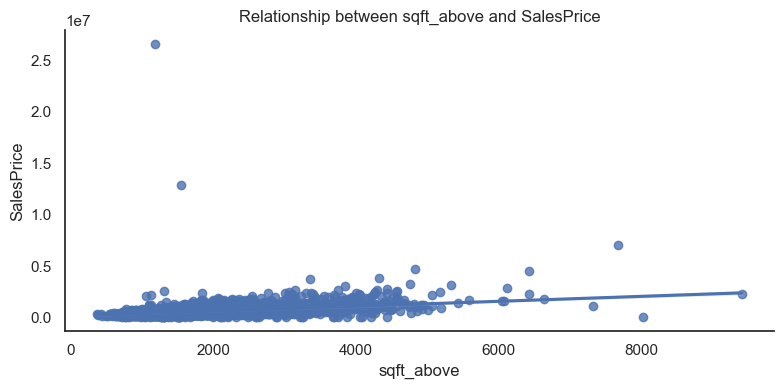

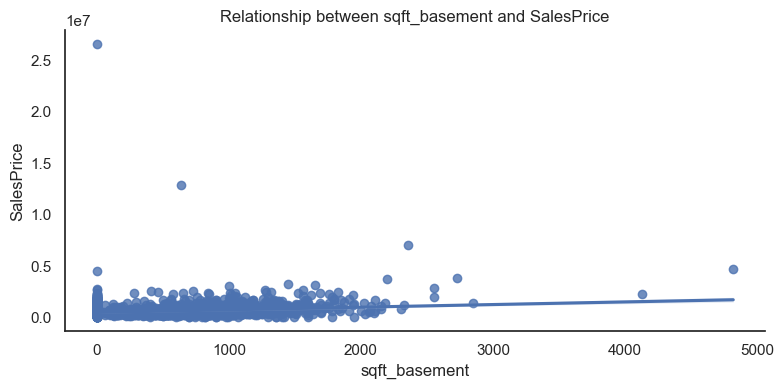

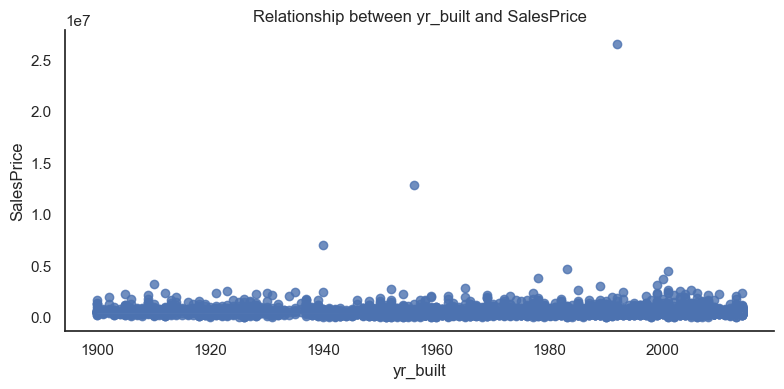

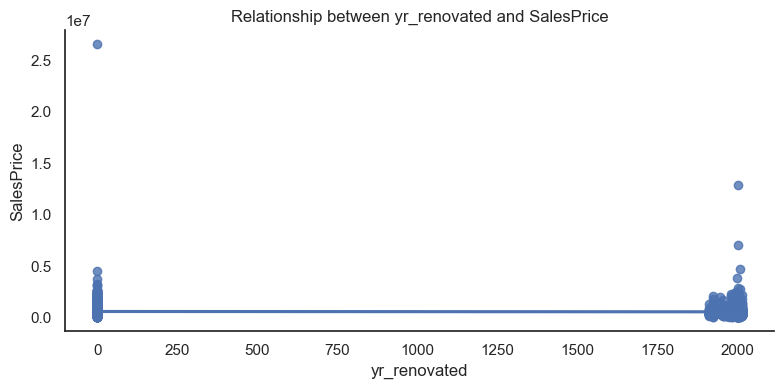

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'date' 
df_no_date = df.drop(columns=['date'])

# correlation matrix
correlation_matrix = df_no_date.corr()

# custom style for the heatmap
sns.set_theme(style="whitegrid")  # You can choose another style if preferred

# heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Reset the style for subsequent plots
sns.set_theme(style="white")

# scatter plots with regression lines for all features (excluding 'date') against 'SalesPrice'
features = df_no_date.columns[:-1]  # Excluding the target variable 'SalesPrice'
for feature in features:
    sns.lmplot(x=feature, y='SalesPrice', data=df_no_date, aspect=2, height=4)
    plt.title(f'Relationship between {feature} and SalesPrice')

plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


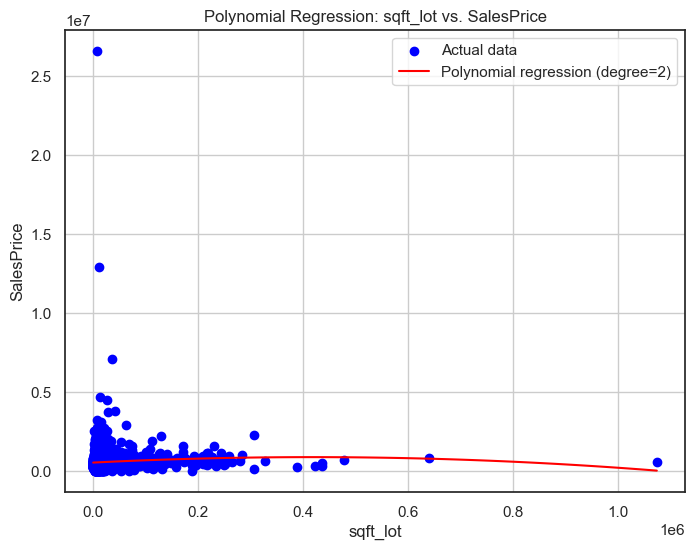

In [35]:
# 13. Use a polynomial feature's function and implement a polynomial regression model of degree 2 for the features sqft_lot and the target variable.


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X_poly = df[['sqft_lot']]  # Independent variable (feature)
y_poly = df['SalesPrice']   # Target variable

# polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly_transformed = poly.fit_transform(X_poly)

# cinear Regression model
poly_model = LinearRegression()

# model using polynomial features
poly_model.fit(X_poly_transformed, y_poly)

# Predict SalesPrice using the polynomial model
X_fit = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
X_fit_transformed = poly.transform(X_fit)
y_predicted = poly_model.predict(X_fit_transformed)

# polynomial regression line along with data points
plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, label='Actual data', color='blue')
plt.plot(X_fit, y_predicted, color='red', label='Polynomial regression (degree=2)')
plt.title('Polynomial Regression: sqft_lot vs. SalesPrice')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from sklearn.metrics import r2_score

# Predict SalesPrice using the polynomial model
y_predicted = poly_model.predict(X_poly_transformed)

# R² score using the score() method of the model
r_squared = poly_model.score(X_poly_transformed, y_poly)
print(f"R-squared (R²) score using score() method: {r_squared}")

# Alternate R² score using r2_score() function
r_squared_alt = r2_score(y_poly, y_predicted)
print(f"R-squared (R²) score using r2_score(): {r_squared_alt}")


R-squared (R²) score using score() method: 0.00446670543314398
R-squared (R²) score using r2_score(): 0.00446670543314398


In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

sqft_lot_feature = df[['sqft_lot']]  # Independent variable (feature)
sales_price_target = df['SalesPrice']   # Target variable

degrees_to_try = [1, 2, 3, 4, 5, 6]

best_degree = None
best_r_squared = -1

# Iterating through different polynomial degrees and evaluating models
for degree in degrees_to_try:
    poly = PolynomialFeatures(degree=degree)
    sqft_lot_transformed = poly.fit_transform(sqft_lot_feature)

    polynomial_model = LinearRegression()
    polynomial_model.fit(sqft_lot_transformed, sales_price_target)

    predicted_sales_price = polynomial_model.predict(sqft_lot_transformed)

    r_squared = r2_score(sales_price_target, predicted_sales_price)

    print(f"Degree {degree} - R-squared (R²) score: {r_squared}")

    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_degree = degree

print(f"\nBest fit - Degree: {best_degree}, R-squared (R²) score: {best_r_squared}")


Degree 1 - R-squared (R²) score: 0.0025453331704339277
Degree 2 - R-squared (R²) score: 0.00446670543314398
Degree 3 - R-squared (R²) score: 0.007104702760799664
Degree 4 - R-squared (R²) score: 0.0017250395682145703
Degree 5 - R-squared (R²) score: 0.0005669714665621495
Degree 6 - R-squared (R²) score: 0.00018269514423274735

Best fit - Degree: 3, R-squared (R²) score: 0.007104702760799664


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


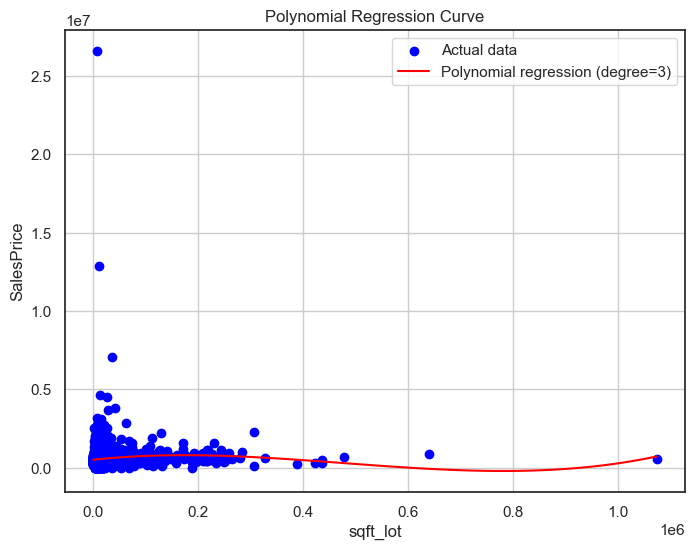

In [38]:
# 16. Plotting the Polynomial Regression Curve along with the Actual Data Points.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Independent variable (feature) and the target variable
sqft_lot_feature = df[['sqft_lot']]  
sales_price_target = df['SalesPrice']  

# Best degree based on our analysis
best_degree = 3

# Polynomial features of the best degree
poly = PolynomialFeatures(degree=best_degree)
sqft_lot_transformed = poly.fit_transform(sqft_lot_feature)

# Fitting a Linear Regression model using polynomial features
polynomial_model = LinearRegression()
polynomial_model.fit(sqft_lot_transformed, sales_price_target)

# Points for plotting the polynomial regression curve
X_fit = np.linspace(sqft_lot_feature.min(), sqft_lot_feature.max(), 100).reshape(-1, 1)
X_fit_transformed = poly.transform(X_fit)
y_fit_predicted = polynomial_model.predict(X_fit_transformed)


# Plotting the polynomial regression curve along with the actual data points
plt.figure(figsize=(8, 6))
plt.scatter(sqft_lot_feature, sales_price_target, label='Actual data', color='blue')
plt.plot(X_fit, y_fit_predicted, color='red', label=f'Polynomial regression (degree={best_degree})')
plt.title('Polynomial Regression Curve')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# 19. Applying RANSAC (Random Sample Consensus) to fit a robust linear regression model to the features 'sqft_lot' and the target variable.

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sqft_lot_feature = df[['sqft_lot']]  # Independent variable (feature)
sales_price_target = df['SalesPrice']   # Target variable

# Data into training and testing sets (for RANSAC)
X_train, X_test, y_train, y_test = train_test_split(sqft_lot_feature, sales_price_target, test_size=0.2, random_state=42)

# RANSACRegressor with a LinearRegression base estimator
ransac = RANSACRegressor(random_state=42)

ransac.fit(X_train, y_train)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predicting SalePrice using the RANSAC model
y_pred = ransac.predict(X_test)

# R-squared (R²) score on the test set
r_squared = ransac.score(X_test, y_test)
print(f"R-squared (R²) score on the test set: {r_squared}")


R-squared (R²) score on the test set: -0.05387255518662659


Coefficients: 2.039113340024952
Intercept: 317528.7413906093


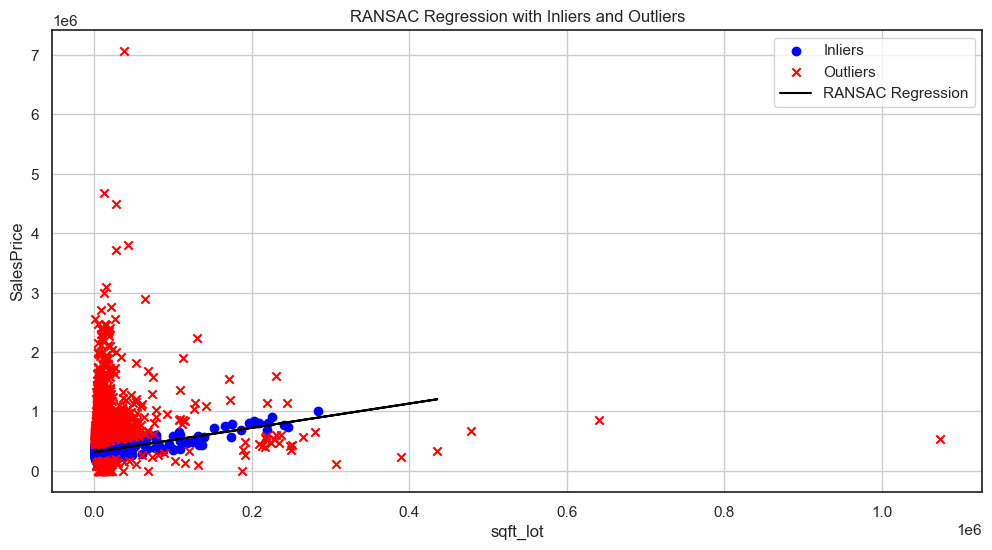

In [40]:
# 20. Printing coefficients and intercept. Visualizing the plot with respect to inliers and outliers.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#coefficients and intercept
coef = ransac.estimator_.coef_[0]
intercept = ransac.estimator_.intercept_
print(f"Coefficients: {coef}")
print(f"Intercept: {intercept}")

# Plotting inliers and outliers
plt.figure(figsize=(12, 6))

plt.scatter(X_train[inlier_mask], y_train[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], c='red', marker='x', label='Outliers')
plt.plot(X_test, y_pred, color='black', label='RANSAC Regression')

plt.title('RANSAC Regression with Inliers and Outliers')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# 21. Print R-squared (R²) score with and without inliers

from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# R-squared (R²) score with all data
r_squared_all = r2_score(y_test, y_pred)

# R-squared (R²) score without inliers
ransac_without_inliers = RANSACRegressor(random_state=42)
ransac_without_inliers.fit(X_train[~inlier_mask], y_train[~inlier_mask])
y_pred_no_inliers = ransac_without_inliers.predict(X_test)

r_squared_no_inliers = r2_score(y_test, y_pred_no_inliers)

print(f"R-squared (R²) score with all data: {r_squared_all}")
print(f"R-squared (R²) score without inliers: {r_squared_no_inliers}")


R-squared (R²) score with all data: -0.05387255518662659
R-squared (R²) score without inliers: -0.6513534830175647


In [42]:
#R-squared score excluding outliers (inliers only)
y_pred_inliers = ransac.predict(X_train[inlier_mask])
r_squared_inliers = r2_score(y_train[inlier_mask], y_pred_inliers)
print(f"R-squared (R²) score excluding outliers (inliers only): {r_squared_inliers}")


R-squared (R²) score excluding outliers (inliers only): 0.23561361261444547


In [43]:
# 22. Compare the results and discuss which model(s) best-predicted housing prices.




# PART 3

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
lifedf = pd.read_csv('LifeExpectancy.csv')

slifedf = pd.read_csv('LifeExpectancy.csv')

lifedf.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [46]:
lifedf_summary = pd.DataFrame(columns=['Feature', 'Mode', 'Mean', 'Median', 'Variance', 'Standard Deviation'])

for i in lifedf.columns:
    if lifedf[i].dtype in ['object', 'category']:
        mode = sts.mode(lifedf[i])
        mean = median = variance = std_dev = 'N/A'
    else:
        mode = 'N/A'
        mean = sts.mean(lifedf[i])
        median = sts.median(lifedf[i])
        variance = sts.pvariance(lifedf[i])
        std_dev = sts.pstdev(lifedf[i])
    lifedf_summary.loc[len(lifedf_summary)] = [i, mode, mean, median, variance, std_dev]

lifedf_summary

,Feature,Mode,Mean,Median,Variance,Standard Deviation
0,Country,Afghanistan,N/A,N/A,N/A,N/A
1,Year,N/A,2007.51872,2008.0,21.280283,4.613056
2,Status,Developing,N/A,N/A,N/A,N/A
3,Life expectancy,N/A,69.234717,72.1,90.392491,9.507497
4,Adult Mortality,N/A,164.725664,144.0,15392.148021,124.065096
5,infant deaths,N/A,30.303948,3.0,13901.926336,117.90643
6,Alcohol,N/A,4.546875,3.755,15.376423,3.921278
7,percentage expenditure,N/A,738.251295,64.912906,3950460.416186,1987.576518
8,Hepatitis B,N/A,83.022124,92.0,528.681267,22.99307
9,Measles,N/A,2419.59224,17.0,131453580.568925,11465.320779


# 2.Identify and specify the target variable from the dataset.

By observing the dataset, based on different factors like immunization factors, mortality factors, economic factors, social factors and other health related factors, we are predicting the LifeExpantancy of the people for different countries. 

By analysing the data by using other variables we can understand their influence on LifeExpectancy. 

So the target variable here is LifeExpectancy.
                                                                                                                                            

In [47]:
# 4. Identify the unique values from each column.

# Unique values for each column
for column in lifedf.columns:
    unique_values = lifedf[column].unique()
    print(f"\nUnique values in '{column}':")
    print(f"{unique_values}")



Unique values in 'Country':
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia'

In [48]:
# 5. Identify the Missing values and compute the missing values with mean, median or mode based on their categories. Also explain why and how you performed each imputation.

df = lifedf

import pandas as pd
import numpy as np

# replace 0 with nan value
cdf = df.replace(0, np.nan)

# Identify missing values in each column
missing_values = cdf.isnull().sum()
print("Missing values in each column:")
print(missing_values)

for column in cdf.columns:
    if cdf[column].dtype == 'object':
        mode_value = cdf[column].mode()[0]
        cdf[column].fillna(mode_value, inplace=True)
    else:
        if cdf[column].isnull().sum() > 0:
            if cdf[column].dtype == 'float64' or cdf[column].dtype == 'int64':
                median_value = cdf[column].median()
                cdf[column].fillna(median_value, inplace=True)

# Explanation of the approach:
# - For categorical columns (object type), missing values are filled with the mode (most frequent value).
# - For numerical columns, missing values are filled with the median value to mitigate the impact of outliers.
# - Median is used instead of mean to be less sensitive to extreme values that might skew the mean.

# Verify if missing values have been filled
print("\nMissing values after imputation:")
print(cdf.isnull().sum())

Missing values in each column:
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                      848
Alcohol                              0
percentage expenditure             611
Hepatitis B                          0
Measles                            983
BMI                                  0
under-five deaths                  785
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    130
Schooling                           28
dtype: int64

Missing values after imputation:
Country                            0
Year                       

We verify the data for missing values by using .isnull(). For the LifeExpectancy data set there are no null values detected. 

If there are null values they can be imputed based on the variable type and distribution of each column. Also depends on outliers.By using the loop functions we impute the missing values in the data. 

Mean: The missing values are imputed by computing the mean value of the particular column when the Variable is continuous and the data without outliers. If the distribution is normal then mean value is imputed. 

Median: We impute the median value for the missing data by finding the median value of the particular variable column if the variable is continuous and the distribution is skewed. If there are outliers in the data also we prefer to impute the median value.

Mode: If the data is categorical and discrete value, we impute the missing data with the most frequently occuring value. We find the mode value of the particular variable column by using .mode(). 

In [49]:
# 6. Check for the outliers in each column using the IQR method
# Outliers for first time 
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")




Outliers in Year: 0
Outliers in Life expectancy: 17
Outliers in Adult Mortality: 86
Outliers in infant deaths: 315
Outliers in Alcohol: 3
Outliers in percentage expenditure: 389
Outliers in Hepatitis B: 322
Outliers in Measles: 542
Outliers in BMI: 0
Outliers in under-five deaths : 394
Outliers in Polio: 279
Outliers in Total expenditure: 51
Outliers in Diphtheria: 298
Outliers in  HIV/AIDS: 542
Outliers in GDP: 445
Outliers in Population: 452
Outliers in thinness  1-19 years: 100
Outliers in thinness 5-9 years: 99
Outliers in Income composition of resources: 130
Outliers in Schooling: 77


In [50]:
# 7.Impute the outliers and impute the outlier values with mean, median or mode based on their categories


#impute the continuous variables outliers with mean or median based on category

for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if df[column].skew() > 0.5 or df[column].skew() < -0.5:
        # Skewed data, use median
        median_value = df[column].median()
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])
    else:
        # Less skewed data, use mean
        mean_value = df[column].mean()
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])


In [51]:
df 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,3.0,0.01,71.279624,65.0,17.0,...,93.0,8.16,65.0,0.1,584.259210,1386542.0,3.3,3.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,3.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,3.3,3.3,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,3.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,1386542.0,3.3,3.3,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,3.0,0.01,78.184215,67.0,17.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,3.3,3.3,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,3.0,0.01,7.097109,68.0,17.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,3.3,3.3,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,72.1,144.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,0.1,454.366654,1386542.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,72.1,144.0,26.0,4.06,0.000000,92.0,17.0,...,93.0,6.52,68.0,0.1,453.351155,1386542.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,0.1,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,144.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,0.1,548.587312,1386542.0,1.6,1.7,0.427,9.8


In [52]:
# Outliers after imputing values 

for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")

Outliers in Year: 0
Outliers in Life expectancy: 3
Outliers in Adult Mortality: 22
Outliers in infant deaths: 410
Outliers in Alcohol: 0
Outliers in percentage expenditure: 373
Outliers in Hepatitis B: 323
Outliers in Measles: 518
Outliers in BMI: 0
Outliers in under-five deaths : 415
Outliers in Polio: 236
Outliers in Total expenditure: 23
Outliers in Diphtheria: 209
Outliers in  HIV/AIDS: 615
Outliers in GDP: 324
Outliers in Population: 455
Outliers in thinness  1-19 years: 33
Outliers in thinness 5-9 years: 36
Outliers in Income composition of resources: 0
Outliers in Schooling: 29


Even after imputing the outliers in data with mean or median or mode based on the type of variable, still there are outliers for the new data. But comparitively less outliers in the new data. Imputing outliers with mean or median not always eliminate them completly, especially when there are more number of outliers. 

There are more methods for impute outliers like log transformation, robust scaling, winsorization technique etc. using these methods for the columns with have outliers, might eliminate the outliers present in data.

By repeating the process and by imputing the outliers, we can get the data with 0 outliers. But repeating the imputation process might leads to data distortion. Some of the outliers also has valuable information. By continuously imputing outliers, we may lost some important data and valuable insights. So repating impute values is usually not recommended. 

In [53]:
# 8. Calculate summary statistics for numerical columns, such as mean, median, standard deviation

df_summary = pd.DataFrame(columns=['Feature', 'Mode', 'Mean', 'Median', 'Variance', 'Standard Deviation'])

for i in df.columns:
    if df[i].dtype in ['object', 'category']:
        mode = sts.mode(df[i])
        mean = median = variance = std_dev = 'N/A'
    else:
        mode = 'N/A'
        mean = sts.mean(df[i])
        median = sts.median(df[i])
        variance = sts.pvariance(df[i])
        std_dev = sts.pstdev(df[i])
    df_summary.loc[len(df_summary)] = [i, mode, mean, median, variance, std_dev]

df_summary

,Feature,Mode,Mean,Median,Variance,Standard Deviation
0,Country,Afghanistan,N/A,N/A,N/A,N/A
1,Year,N/A,2007.51872,2008.0,21.280283,4.613056
2,Status,Developing,N/A,N/A,N/A,N/A
3,Life expectancy,N/A,69.40371,72.1,86.367852,9.293431
4,Adult Mortality,N/A,152.80599,144.0,10719.273456,103.533924
5,infant deaths,N/A,8.059905,3.0,162.618603,12.7522
6,Alcohol,N/A,4.532953,3.755,15.208308,3.899783
7,percentage expenditure,N/A,147.419882,64.884537,51852.312922,227.711029
8,Hepatitis B,N/A,90.406399,92.0,68.506726,8.276879
9,Measles,N/A,70.735194,17.0,25050.333554,158.272972


In [54]:
# preprocessing data by using label encoding 
from sklearn.preprocessing import LabelEncoder
import pandas as pd

Label = LabelEncoder()

# Identified 'country' and 'status' columns which required to perform label encoding
columns_to_Labelencode = ['Country', 'Status']

# Perform label encoding on identified columns such as 'Country' and 'Status'
for column in columns_to_Labelencode:
    df[column] = Label.fit_transform(df[column])


In [55]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,263.0,3.0,0.01,71.279624,65.0,17.0,...,93.0,8.16,65.0,0.1,584.259210,1386542.0,3.3,3.3,0.479,10.1
1,0,2014.0,1,59.9,271.0,3.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,3.3,3.3,0.476,10.0
2,0,2013.0,1,59.9,268.0,3.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,1386542.0,3.3,3.3,0.470,9.9
3,0,2012.0,1,59.5,272.0,3.0,0.01,78.184215,67.0,17.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,3.3,3.3,0.463,9.8
4,0,2011.0,1,59.2,275.0,3.0,0.01,7.097109,68.0,17.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,3.3,3.3,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,72.1,144.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,0.1,454.366654,1386542.0,9.4,9.4,0.407,9.2
2934,192,2003.0,1,72.1,144.0,26.0,4.06,0.000000,92.0,17.0,...,93.0,6.52,68.0,0.1,453.351155,1386542.0,9.8,9.9,0.418,9.5
2935,192,2002.0,1,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,0.1,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001.0,1,45.3,144.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,0.1,548.587312,1386542.0,1.6,1.7,0.427,9.8


In [56]:
# 10.Perform data normalization on ‘Adult Mortality', 'BMI', 'GDP’ numerical columns using StandardScaler()


from sklearn.preprocessing import StandardScaler
import pandas as pd


columns_to_normalize = ['Adult Mortality', 'BMI', 'GDP']
df_to_normalize = df[columns_to_normalize]
print(df_to_normalize)

scaler = StandardScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head()



      Adult Mortality   BMI         GDP
0               263.0  19.1  584.259210
1               271.0  18.6  612.696514
2               268.0  18.1  631.744976
3               272.0  17.6  669.959000
4               275.0  17.2   63.537231
...               ...   ...         ...
2933            144.0  27.1  454.366654
2934            144.0  26.7  453.351155
2935             73.0  26.3   57.348340
2936            144.0  25.9  548.587312
2937            144.0  25.5  547.358878

[2938 rows x 3 columns]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,1.064328,3.0,0.01,71.279624,65.0,17.0,...,93.0,8.16,65.0,0.1,-0.735785,1386542.0,3.3,3.3,0.479,10.1
1,0,2014.0,1,59.9,1.141597,3.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,-0.721340,327582.0,3.3,3.3,0.476,10.0
2,0,2013.0,1,59.9,1.112621,3.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,-0.711664,1386542.0,3.3,3.3,0.470,9.9
3,0,2012.0,1,59.5,1.151256,3.0,0.01,78.184215,67.0,17.0,...,67.0,8.52,67.0,0.1,-0.692253,3696958.0,3.3,3.3,0.463,9.8
4,0,2011.0,1,59.2,1.180232,3.0,0.01,7.097109,68.0,17.0,...,68.0,7.87,68.0,0.1,-1.000291,2978599.0,3.3,3.3,0.454,9.5


In [57]:
df.describe()


# Normalization transfers all the features or columns on same scale. This improves the training data performance of the model 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.825732,69.403710,-1.233413e-16,8.059905,4.532953,147.419882,90.406399,70.735194,...,89.487406,5.786043,89.714091,0.213376,2.418457e-17,1.720022e+06,4.277332,4.291491,0.660318,12.195371
std,56.244904,4.613841,0.379405,9.295013,1.000170e+00,12.754371,3.900447,227.749792,8.278288,158.299914,...,10.783820,2.152228,10.287456,0.305162,1.000170e+00,2.019180e+06,3.390476,3.421240,0.153925,2.850113
min,0.000000,2000.000000,0.000000,44.800000,-1.466244e+00,0.000000,0.010000,0.000000,61.000000,0.000000,...,51.000000,0.370000,51.000000,0.100000,-1.031711e+00,3.400000e+01,0.100000,0.100000,0.253000,4.700000
25%,46.000000,2004.000000,1.000000,63.425000,-7.611611e-01,0.000000,1.092500,4.685343,89.000000,0.000000,...,86.000000,4.370000,86.000000,0.100000,-7.377008e-01,4.189172e+05,1.600000,1.600000,0.554000,10.500000
50%,93.000000,2008.000000,1.000000,72.100000,-8.505416e-02,3.000000,3.755000,64.884537,92.000000,17.000000,...,93.000000,5.755000,93.000000,0.100000,-1.350260e-01,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,145.000000,2012.000000,1.000000,75.600000,6.296874e-01,9.000000,7.380000,168.945236,96.000000,36.000000,...,97.000000,7.150000,97.000000,0.100000,7.377840e-02,1.386542e+06,6.600000,6.600000,0.772000,14.100000
max,192.000000,2015.000000,1.000000,89.000000,2.909134e+00,55.000000,16.580000,1092.155356,99.000000,899.000000,...,99.000000,11.710000,99.000000,1.800000,4.039606e+00,9.999617e+06,15.300000,15.500000,0.948000,19.700000


In [58]:
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,1.064328,3.0,0.01,71.279624,65.0,17.0,...,93.0,8.16,65.0,0.1,-0.735785,1386542.0,3.3,3.3,0.479,10.1
1,0,2014.0,1,59.9,1.141597,3.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,-0.721340,327582.0,3.3,3.3,0.476,10.0
2,0,2013.0,1,59.9,1.112621,3.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,-0.711664,1386542.0,3.3,3.3,0.470,9.9
3,0,2012.0,1,59.5,1.151256,3.0,0.01,78.184215,67.0,17.0,...,67.0,8.52,67.0,0.1,-0.692253,3696958.0,3.3,3.3,0.463,9.8
4,0,2011.0,1,59.2,1.180232,3.0,0.01,7.097109,68.0,17.0,...,68.0,7.87,68.0,0.1,-1.000291,2978599.0,3.3,3.3,0.454,9.5


In [59]:
# 11.Compute a correlation matrix and plot the correlation using a heat map and answer the  following questions
# (a) The Features which are Most Positively Correlated with target variable. 
# (b) The Features which are Most Negatively Correlated with target variable.

#finding correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.001544,-0.001740,0.108886,-0.058228,-0.027880,-0.031093,0.040973,...,-0.044058,0.003688,-0.043724,0.022986,-0.053209,-0.015918,0.064933,0.079403,-0.028694,-0.016519
Year,0.001342,1.000000,0.001864,0.157622,-0.022766,-0.006106,-0.070403,0.034977,0.017326,0.027981,...,0.094191,0.065204,0.094386,0.020994,0.156710,0.012898,-0.046484,-0.041262,0.123676,0.162644
Status,-0.031635,0.001864,1.000000,-0.484150,0.324448,0.236532,-0.584498,-0.066107,-0.133006,0.011987,...,-0.229971,-0.280013,-0.241323,0.170709,-0.101799,-0.075062,0.400682,0.402207,-0.524536,-0.502019
Life expectancy,-0.001544,0.157622,-0.484150,1.000000,-0.597023,-0.392787,0.392701,0.222716,0.268011,-0.122072,...,0.455463,0.243415,0.433472,-0.232449,0.310051,0.020899,-0.543060,-0.537264,0.806821,0.713399
Adult Mortality,-0.001740,-0.022766,0.324448,-0.597023,1.000000,0.254093,-0.210593,-0.140097,-0.193387,0.082474,...,-0.286125,-0.166050,-0.264230,0.222821,-0.160934,0.037897,0.330304,0.336981,-0.504228,-0.437619
infant deaths,0.108886,-0.006106,0.236532,-0.392787,0.254093,1.000000,-0.282383,-0.118575,-0.172036,0.202084,...,-0.215314,-0.073975,-0.236988,0.186266,-0.170556,0.057551,0.342427,0.328552,-0.437988,-0.381555
Alcohol,-0.058228,-0.070403,-0.584498,0.392701,-0.210593,-0.282383,1.000000,0.130929,0.165915,-0.093868,...,0.246073,0.321836,0.272273,-0.188690,0.192922,0.092151,-0.391675,-0.386145,0.500137,0.517104
percentage expenditure,-0.027880,0.034977,-0.066107,0.222716,-0.140097,-0.118575,0.130929,1.000000,0.084137,-0.057972,...,0.126162,0.096063,0.135122,-0.097419,0.635230,0.027208,-0.128525,-0.125235,0.255555,0.262862
Hepatitis B,-0.031093,0.017326,-0.133006,0.268011,-0.193387,-0.172036,0.165915,0.084137,1.000000,-0.071968,...,0.540450,0.040941,0.601619,-0.141232,0.132094,-0.031668,-0.082965,-0.086289,0.304221,0.278931
Measles,0.040973,0.027981,0.011987,-0.122072,0.082474,0.202084,-0.093868,-0.057972,-0.071968,1.000000,...,-0.073079,-0.038911,-0.076655,0.013960,-0.075934,0.019431,0.144869,0.139066,-0.136462,-0.134626


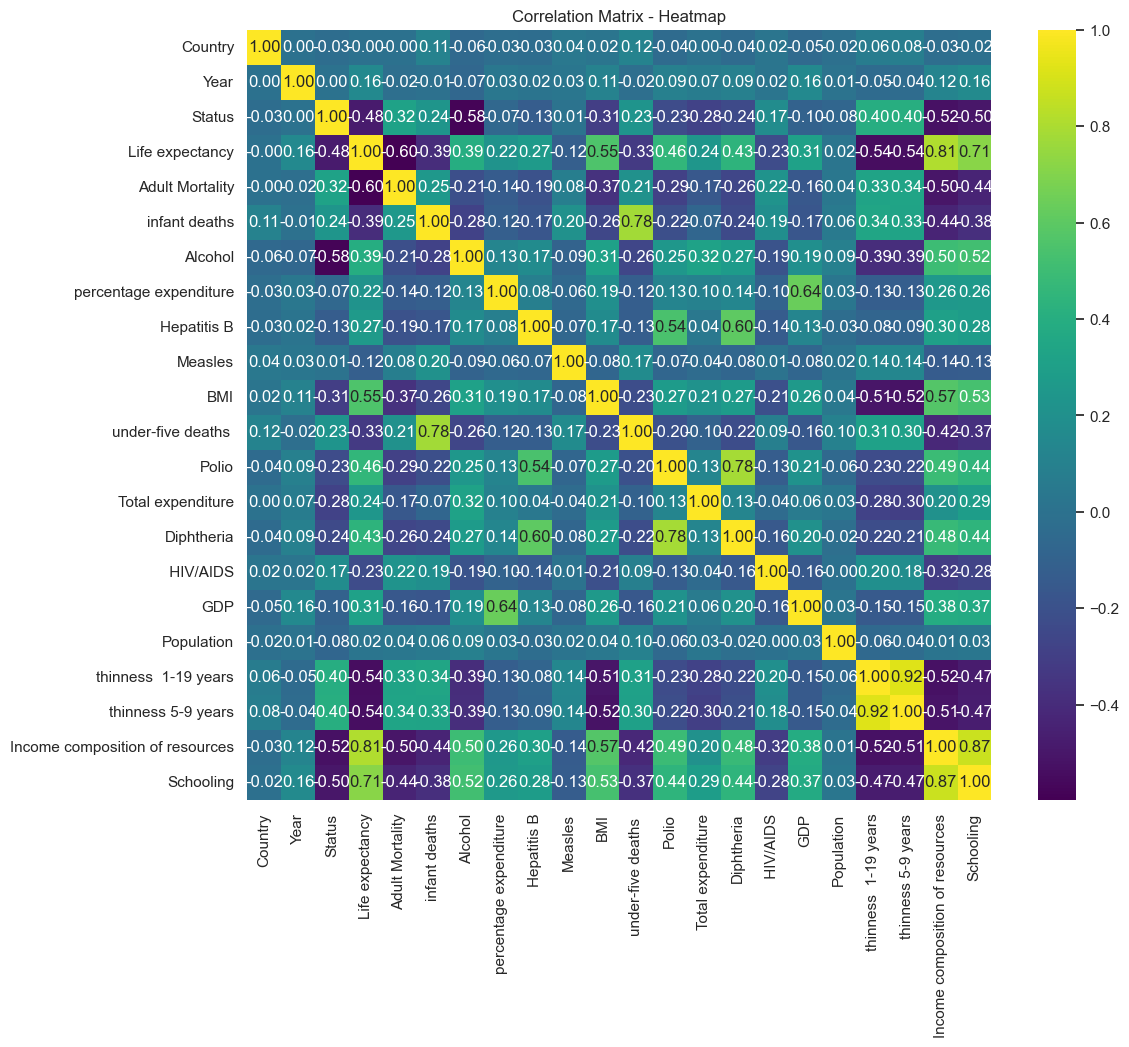

In [60]:
# Plotting a heatmap for the correlation matrix.

import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom style for the heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix - Heatmap")
plt.show()


In [61]:
# Identifying the most positively and negatively correlated features with the target variable 'Life expectancy'
target_variable = 'Life expectancy'
most_positive_correlation = correlation_matrix[target_variable].drop(target_variable).idxmax()
most_negative_correlation = correlation_matrix[target_variable].drop(target_variable).idxmin()

most_positive_correlation, most_negative_correlation, correlation_matrix[target_variable].sort_values(ascending=False)

('Income composition of resources',
 'Adult Mortality',
 Life expectancy                    1.000000
 Income composition of resources    0.806821
 Schooling                          0.713399
 BMI                                0.554049
 Polio                              0.455463
 Diphtheria                         0.433472
 Alcohol                            0.392701
 GDP                                0.310051
 Hepatitis B                        0.268011
 Total expenditure                  0.243415
 percentage expenditure             0.222716
 Year                               0.157622
 Population                         0.020899
 Country                           -0.001544
 Measles                           -0.122072
  HIV/AIDS                         -0.232449
 under-five deaths                 -0.327706
 infant deaths                     -0.392787
 Status                            -0.484150
 thinness 5-9 years                -0.537264
 thinness  1-19 years              -0.543060

(a) The Features which are Most Positively Correlated with target variable.
Target variable here is Lifeexpectancy. IncomeCompositionOfResources and Schooling are most positively correlated with target variable

(b) The Features which are Most Negatively Correlated with target variable
The most negatively correlated with target variable are AdultMortality, followed by thiness 1-19 years and thinness 5-9 years and by status.


In [62]:
# 12.Drop the column ‘country’ from the dataset and split the dataset into training and testing in a 70:30 split

# drooping the Country column from the dataset
data_cleaned=df.drop('Country', axis=1)


In [63]:
data_cleaned.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015.0,1,65.0,1.064328,3.0,0.01,71.279624,65.0,17.0,-0.967349,...,93.0,8.16,65.0,0.1,-0.735785,1386542.0,3.3,3.3,0.479,10.1
1,2014.0,1,59.9,1.141597,3.0,0.01,73.523582,62.0,492.0,-0.992434,...,58.0,8.18,62.0,0.1,-0.721340,327582.0,3.3,3.3,0.476,10.0
2,2013.0,1,59.9,1.112621,3.0,0.01,73.219243,64.0,430.0,-1.017519,...,62.0,8.13,64.0,0.1,-0.711664,1386542.0,3.3,3.3,0.470,9.9
3,2012.0,1,59.5,1.151256,3.0,0.01,78.184215,67.0,17.0,-1.042605,...,67.0,8.52,67.0,0.1,-0.692253,3696958.0,3.3,3.3,0.463,9.8
4,2011.0,1,59.2,1.180232,3.0,0.01,7.097109,68.0,17.0,-1.062673,...,68.0,7.87,68.0,0.1,-1.000291,2978599.0,3.3,3.3,0.454,9.5


In [64]:
X = data_cleaned.drop('Life expectancy', axis=1)
y = data_cleaned['Life expectancy']

In [65]:
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# It's important to scale features for SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [66]:
X_train_scaled.shape


(2056, 20)

In [67]:
y_train.shape

(2056,)

In [68]:
X_test_scaled.shape

(882, 20)

In [69]:
y_test.shape

(882,)

In [70]:
# 13.Build a linear regression model using the training and testing datasets and compute mean absolute error.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 3.293013845875421


In [73]:

# Building a Linear Regression Model using Stochastic Gradient Descent
sgd_model = SGDRegressor(alpha=0.0001,max_iter=1000, learning_rate='invscaling', random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mae_sgd

3.281180517445507

In [74]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.utils import gen_batches

def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, batch_size=32, max_iter=1000, alpha=0.0001):
    model = SGDRegressor(max_iter=1, learning_rate='invscaling', eta0=alpha, warm_start=True, penalty=None)
    n_samples = X_train.shape[0]

    for _ in range(max_iter):
        for batch in gen_batches(n_samples, batch_size):
            model.partial_fit(X_train[batch], y_train.iloc[batch])
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Data split into X_train_scaled, y_train, X_test_scaled, y_test
mae_mini_batch = mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test)

In [75]:
mae_mini_batch

3.315632858104701

In [76]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Custom function for mini-batch gradient descent
def mini_batch_gradient_descent(X, y, learning_rate=0.0001, batch_size=32, n_epochs=1000):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X)) 
    y = y.reshape(m, 1)
    theta = np.zeros((n + 1, 1))  # Initializing coefficients

    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]
            predictions = X_i.dot(theta)

            gradients = 2 / X_i.shape[0] * X_i.T.dot(predictions - y_i)
            theta -= learning_rate * gradients

    return theta

# Train the model manually
theta_manual = mini_batch_gradient_descent(X_train_scaled, y_train.values, learning_rate=0.0001, batch_size=32, n_epochs=1000)

# Predict function
def predict(X, theta):
    X_b = np.hstack((np.ones((X.shape[0], 1)), X)) # Add bias term
    return np.dot(X_b, theta)

# Evaluate
y_pred_manual = predict(X_test_scaled, theta_manual)
mae_manual = mean_absolute_error(y_test, y_pred_manual)

mae_manual


3.2942272718198806